In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Data**

In [2]:
df = pd.read_csv(r"D:\Ausaaf\ALLIMPORTS\webseries dataset\IMDB Top Webseries.csv", index_col=0)

**Inspecting Data**

In [3]:
df.head()

,Title,Ratings,Duration (in Min),Votes,Released_year,Genre,Summary
Sr.No,,,,,,,
1,Breaking Bad,9.5,49.0,1819514,2008,Crime,A high school chemistry teacher diagnosed with...
2,Game of Thrones,9.2,57.0,2044330,2011,Action,Nine noble families fight for control over the...
3,Mirzapur,8.5,60.0,70705,2018,Action,A shocking incident at a wedding procession ig...
4,The Boys,8.7,60.0,462292,2019,Action,A group of vigilantes set out to take down cor...
5,Daredevil,8.6,54.0,432354,2015,Action,"A blind lawyer by day, vigilante by night. Mat..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 78
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              78 non-null     object 
 1   Ratings            78 non-null     float64
 2   Duration (in Min)  77 non-null     float64
 3   Votes              78 non-null     int64  
 4   Released_year      78 non-null     int64  
 5   Genre              78 non-null     object 
 6   Summary            78 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.9+ KB


In [5]:
df.shape

(78, 7)

Data Cleaning

In [6]:
df.isna().sum()

Title                0
Ratings              0
Duration (in Min)    1
Votes                0
Released_year        0
Genre                0
Summary              0
dtype: int64

In [7]:
df[df['Duration (in Min)'].isna()]

,Title,Ratings,Duration (in Min),Votes,Released_year,Genre,Summary
Sr.No,,,,,,,
47,Ninjak vs the Valiant Universe,6.6,NaN,380,2018,Action,A British intelligence agent and martial artis...


In [8]:
df['Duration (in Min)'].fillna(72, inplace=True)

In [9]:
df.isna().sum()

Title                0
Ratings              0
Duration (in Min)    0
Votes                0
Released_year        0
Genre                0
Summary              0
dtype: int64

As there was only one missing value i just googled it and updated it

**Descriptive Statistics**

In [10]:
average_rating = df.Ratings.mean()
print(f'Average Rating throughout the dataset: {round(average_rating, 3)}')

Average Rating throughout the dataset: 8.041


Keeping in mind this dataset is only of top series 

In [11]:
average_voters = df.Votes.mean()
print(f'Average Votes throughout the dataset: {round(average_voters, 2)}')

Average Votes throughout the dataset: 185738.59


In [12]:
average_duration = df['Duration (in Min)'].mean()
print(f'Average Duration of Series: {round(average_duration, 2)} mins')

Average Duration of Series: 86.81 mins


**Visualisation**

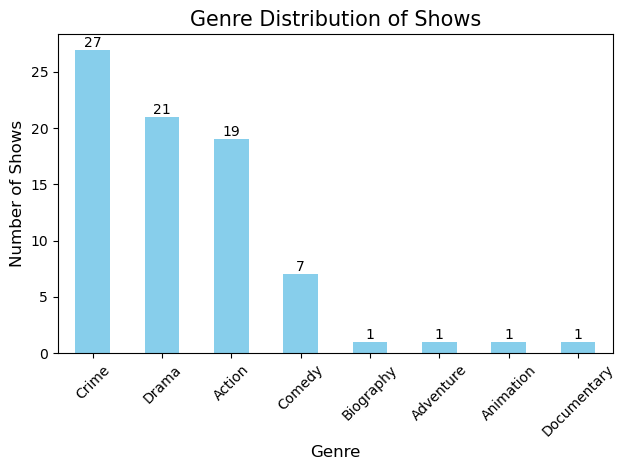

In [13]:
genre_distribution = df['Genre'].value_counts()

ax = genre_distribution.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution of Shows', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

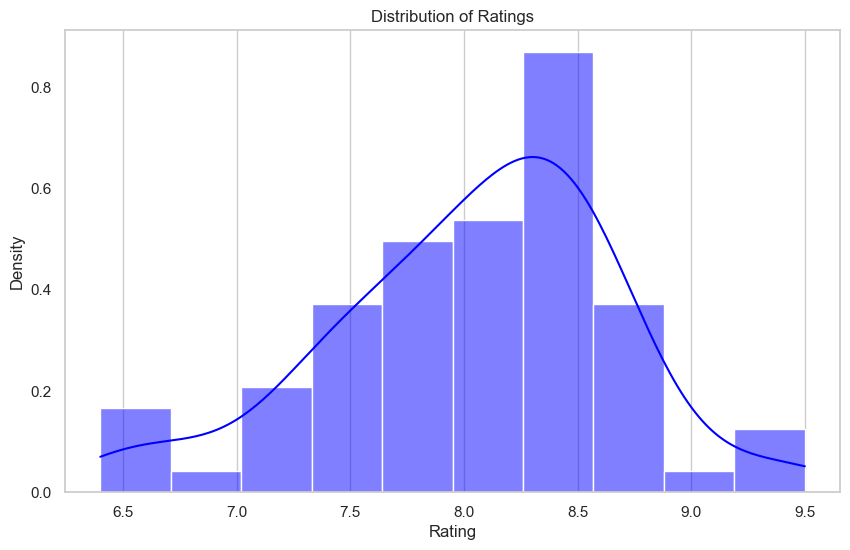

In [14]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=10, kde=True, color='blue', stat='density')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(axis='y')
plt.show()

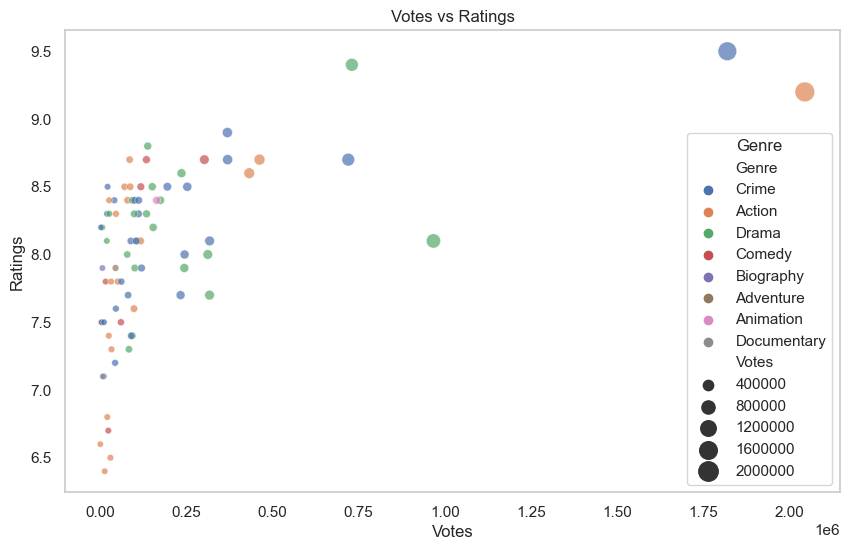

In [15]:
sns.set(style='whitegrid')

# Create scatter plot for Votes vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Ratings', hue='Genre', size='Votes', sizes=(20, 200), alpha=0.7)
plt.title('Votes vs Ratings')
plt.xlabel('Votes')
plt.ylabel('Ratings')
plt.grid()
plt.legend(title='Genre')
plt.show()

**Overall Trend:**

There's a general trend suggesting that movies with **more votes tend to have higher ratings.** This is indicated by the upward slope of the data points as you move from left to right.

**Genre-Specific Observations:**

**Crime and Action:** These genres have a mix of movies with high and low ratings, even with a relatively large number of votes. This suggests that popularity (votes) doesn't always correlate strongly with critical acclaim (ratings) in these genres.

**Drama and Comedy:** These genres show a wider range of ratings, with some movies receiving very high ratings despite having fewer votes. This might indicate that critical acclaim is more important for these genres than the number of votes.

**Biography and Adventure:** These genres seem to have a more concentrated distribution of ratings, with most movies falling within a certain range. This could suggest a more consistent pattern in how these genres are rated.

**Animation and Documentary:** These genres have a relatively smaller number of data points, making it harder to draw definitive conclusions. However, there seems to be a general trend of higher ratings with increasing votes.

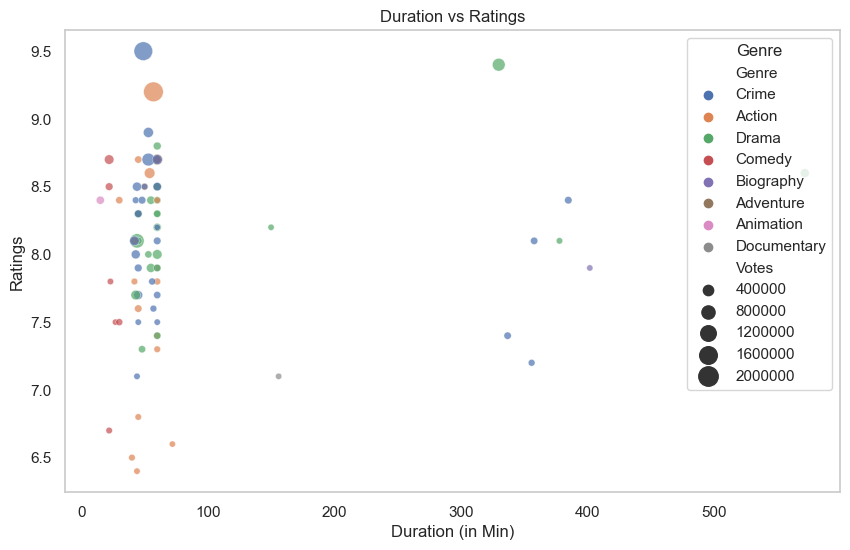

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (in Min)', y='Ratings', hue='Genre', size='Votes', sizes=(20, 200), alpha=0.7)
plt.title('Duration vs Ratings')
plt.xlabel('Duration (in Min)')
plt.ylabel('Ratings')
plt.grid()
plt.legend(title='Genre')
plt.show()

**Duration vs. Ratings:** There **doesn't seem to be a strong, clear correlation** between the duration of a movie and its rating. The data points are scattered across the plot, indicating that movies of varying lengths can receive both high and low ratings.

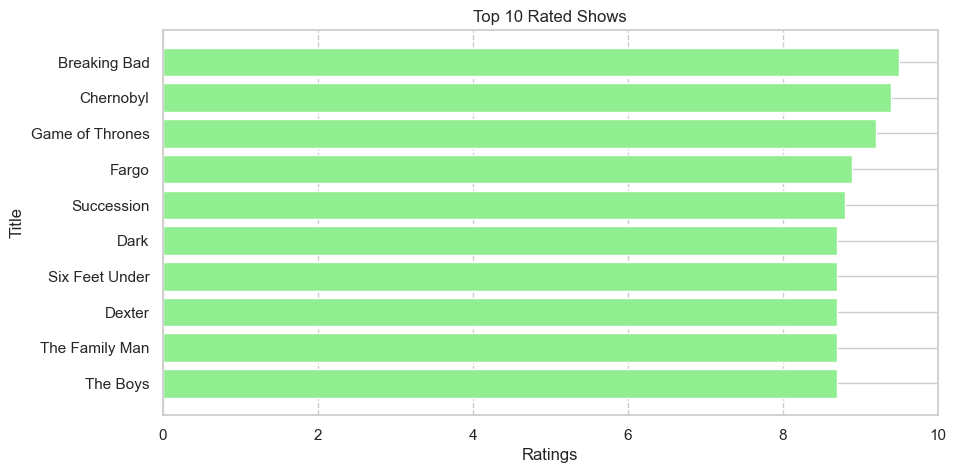

In [17]:
top_10 = df.nlargest(10, 'Ratings').sort_values(by='Ratings', ascending=True)
plt.figure(figsize=(10, 5))
plt.barh(top_10['Title'], top_10['Ratings'], color='lightgreen')
plt.title('Top 10 Rated Shows')
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.xlim(0, 10)  # Set x-axis limits
plt.grid(axis='x', linestyle='--')
plt.show()

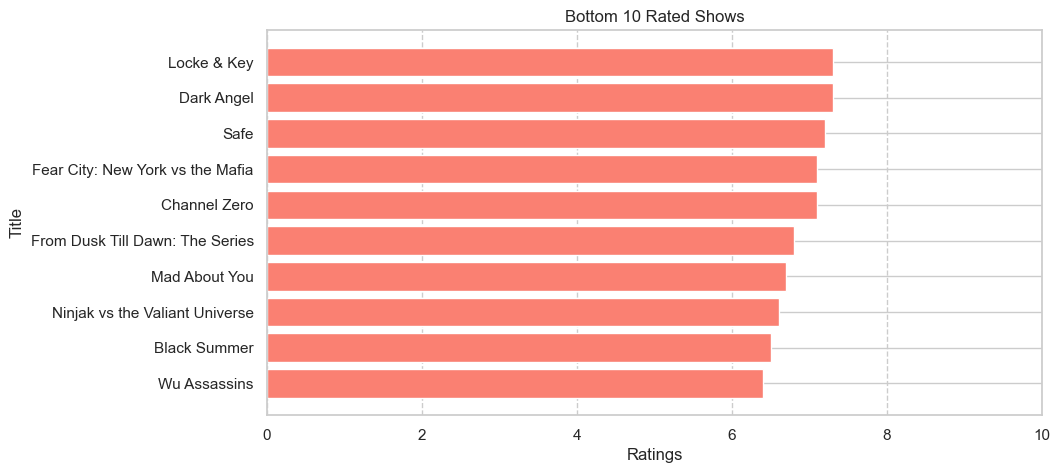

In [18]:
bottom_10 = df.nsmallest(10, 'Ratings')
plt.figure(figsize=(10, 5))
plt.barh(bottom_10['Title'], bottom_10['Ratings'], color='salmon')
plt.title('Bottom 10 Rated Shows')
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.xlim(0, 10)  # Set x-axis limits
plt.grid(axis='x', linestyle='--')
plt.show()

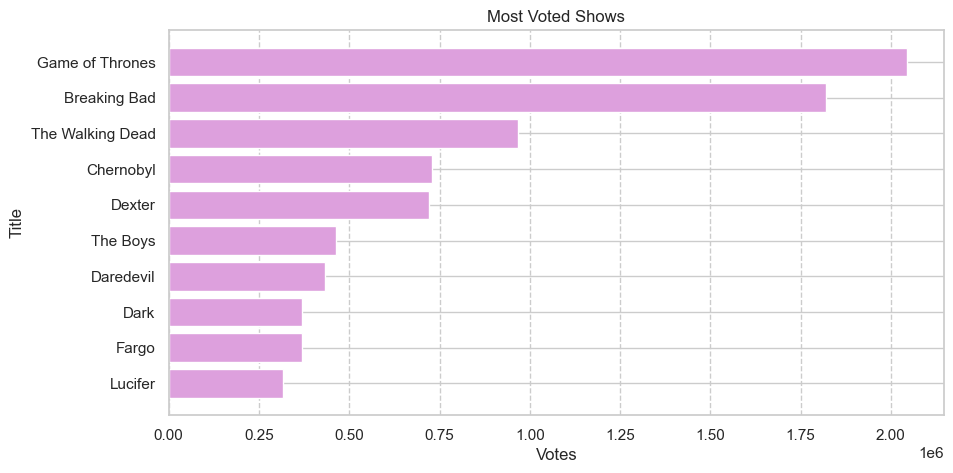

In [19]:
most_voted = df.nlargest(10, 'Votes').sort_values(by='Votes', ascending=True)
plt.figure(figsize=(10, 5))
plt.barh(most_voted['Title'], most_voted['Votes'], color='plum')
plt.title('Most Voted Shows')
plt.xlabel('Votes')
plt.ylabel('Title')
plt.grid(axis='x', linestyle='--')
plt.show()

<Figure size 1000x500 with 0 Axes>

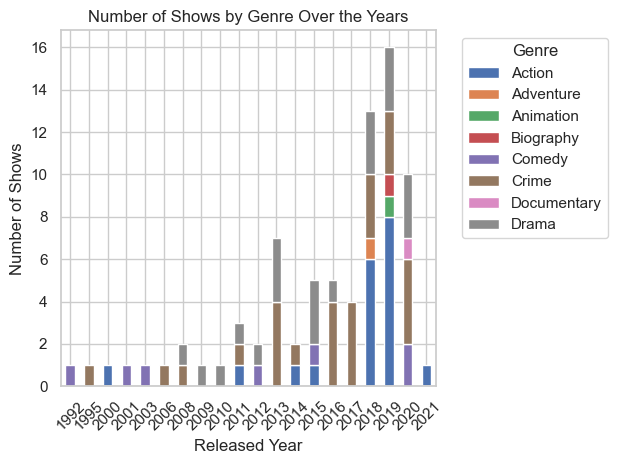

In [20]:
plt.figure(figsize=(10, 5))
genre_trend = df.groupby(['Released_year', 'Genre']).size().unstack(fill_value=0)
genre_trend.plot(kind='bar', stacked=True)
plt.title('Number of Shows by Genre Over the Years')
plt.xlabel('Released Year')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

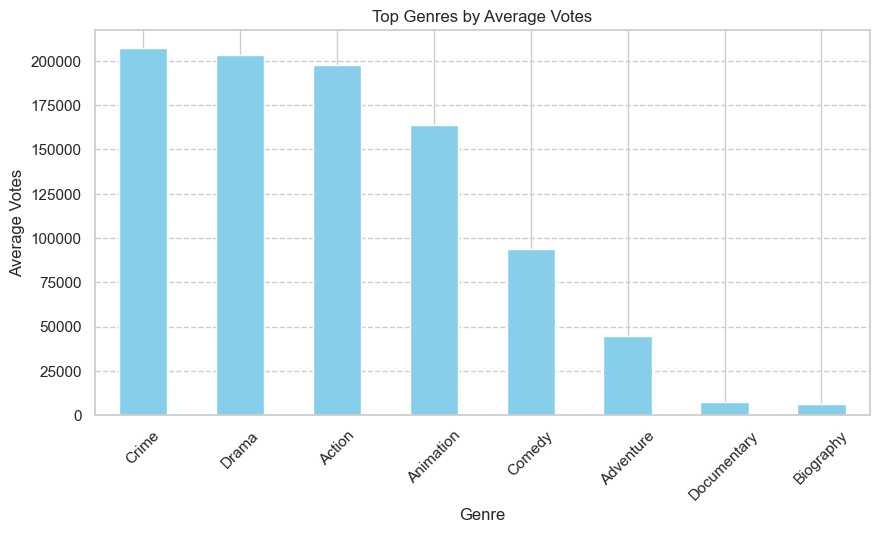

In [21]:
top_genres_votes = df.groupby('Genre')['Votes'].mean().sort_values(ascending=False)

# Plotting Top Genres by Votes
plt.figure(figsize=(10, 5))
top_genres_votes.plot(kind='bar', color='skyblue')
plt.title('Top Genres by Average Votes')
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

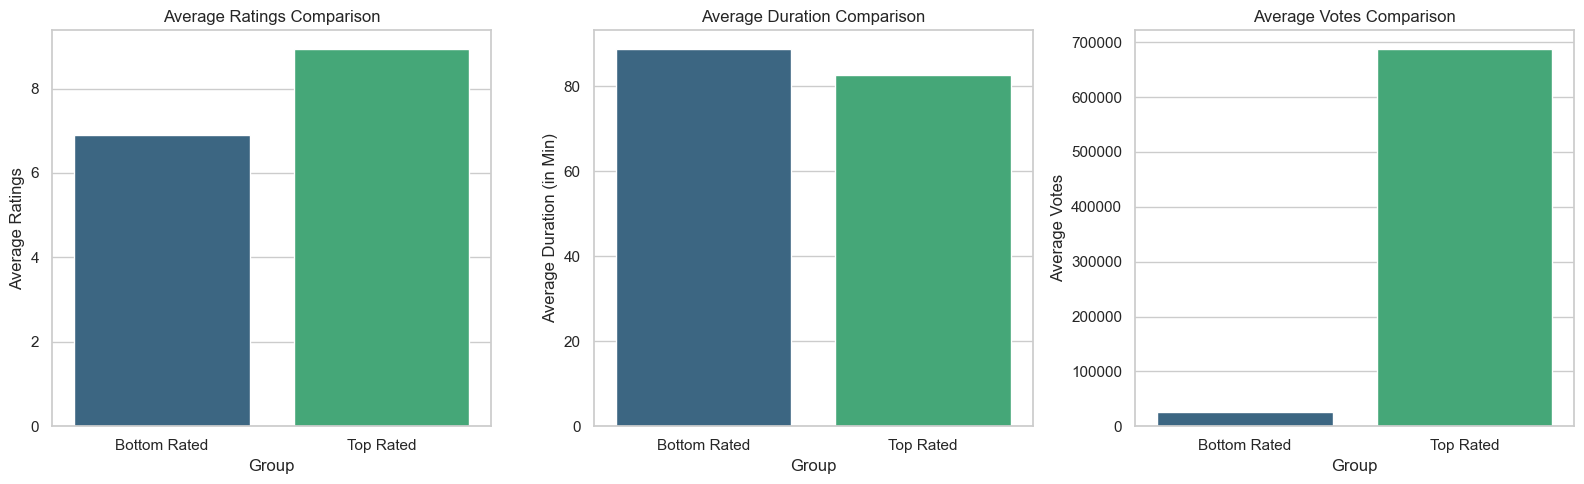

             Ratings                                                \
               count  mean       std  min    25%   50%    75%  max   
Group                                                                
Bottom Rated    10.0  6.90  0.339935  6.4  6.625  6.95  7.175  7.3   
Top Rated       10.0  8.93  0.316403  8.7  8.700  8.75  9.125  9.5   

             Duration (in Min)        ...              Votes            \
                         count  mean  ...   75%    max count      mean   
Group                                 ...                                
Bottom Rated              10.0  88.7  ...  69.0  356.0  10.0   26508.2   
Top Rated                 10.0  82.7  ...  60.0  330.0  10.0  687242.1   

                                                                      \
                        std      min        25%       50%        75%   
Group                                                                  
Bottom Rated   23759.511727    380.0   11349.25   22066.5   32

In [22]:
top_shows = df.nlargest(10, 'Ratings')
bottom_shows = df.nsmallest(10, 'Ratings')
comparison_df = pd.concat([top_shows.assign(Group='Top Rated'), bottom_shows.assign(Group='Bottom Rated')])

mean_values = comparison_df.groupby('Group')[['Ratings', 'Duration (in Min)', 'Votes']].mean().reset_index()
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Group', y='Ratings', data=mean_values, palette='viridis')
plt.title('Average Ratings Comparison')
plt.ylabel('Average Ratings')
plt.subplot(1, 3, 2)
sns.barplot(x='Group', y='Duration (in Min)', data=mean_values, palette='viridis')
plt.title('Average Duration Comparison')
plt.ylabel('Average Duration (in Min)')
plt.subplot(1, 3, 3)
sns.barplot(x='Group', y='Votes', data=mean_values, palette='viridis')
plt.title('Average Votes Comparison')
plt.ylabel('Average Votes')
plt.tight_layout()
plt.show()

summary_stats = comparison_df.groupby('Group')[['Ratings', 'Duration (in Min)', 'Votes']].describe()
print(summary_stats)